In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
class SGD:
  def __init__(self, epochs=200, lr=0.1, batch_size=50):
    self.weights = None
    self.bias = None
    self.epochs = epochs
    self.lr = lr
    self.batch_size = batch_size

  def fit(self, x, y):
    X = np.array(x)
    Y = np.array(y).reshape(y.shape[0], 1)
    self.weights = np.array(random.sample(range(0, 10), X.shape[1])).reshape(X.shape[1], 1)
    self.bias = random.sample(range(0, 10), 1)[0]
    for epoch in range(self.epochs):
      if epoch == 0:
        continue
      elif epoch%10==0:
        self.lr = (self.batch_size/10)/epoch

      shuffled_index = np.random.permutation(X.shape[0])
      x_shuffled = X[shuffled_index]
      y_shuffled = Y[shuffled_index]
      for i in range(self.batch_size):
        index = np.random.randint(self.batch_size)
        x_selected = x_shuffled[index]
        y_selected = y_shuffled[index]
        self.weights = self.weights - (self.lr * (1/X.shape[0]) * (x_selected * ((x_selected @ self.weights + self.bias).reshape(1, 1) - y_selected))).reshape(self.weights.shape[0], self.weights.shape[1])
        self.bias = self.bias - (self.lr * (1/X.shape[0]) * ((x_selected @ self.weights + self.bias) - y_selected))

  def predict(self, x):
    return (x @ self.weights + self.bias)

In [3]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100, n_features=1, noise=80, random_state=42)
print(x.shape, y.shape)

(100, 1) (100,)


In [4]:
sgd = SGD()

In [5]:
sgd.fit(x, y)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(x, y)

LinearRegression()

In [8]:
sgdpred = sgd.predict(x)

In [9]:
lrpred = lr.predict(x)

In [10]:
y = y.reshape(x.shape[0], 1)

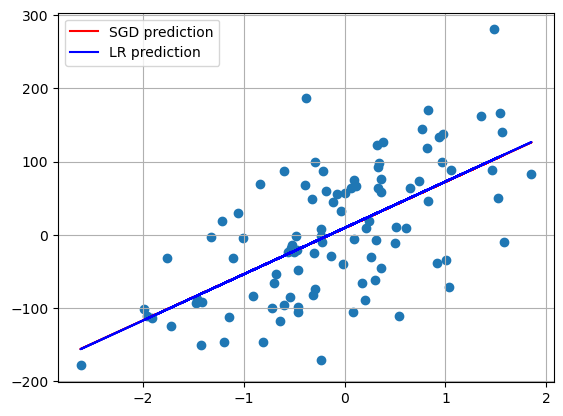

In [11]:
plt.scatter(x, y)
plt.plot(x, sgdpred, color="red", label="SGD prediction")
plt.plot(x, lrpred, color="blue", label="LR prediction")
plt.legend()
plt.grid()